In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
trainXTxt = open('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', 'r')
trainXTxtLines = trainXTxt.readlines()
trainYTxt = open('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', 'r')
trainYTxtLines = trainYTxt.readlines()

testXTxt = open('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', 'r')
testXTxtLines = testXTxt.readlines()
testYTxt = open('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', 'r')
testYTxtLines = testYTxt.readlines()

In [4]:
import pandas as pd
trainX = []
trainY = []
testX = []
testY = []

for line in trainXTxtLines:
  line = line.strip()
  temp = line.split(" ")
  temp[:] = [x for x in temp if x]
  for i in range(len(temp)):
    temp[i] = float(temp[i])
  trainX.append(temp)

for line in trainYTxtLines:
  line = line.strip()
  trainY.append(int(line))

for line in testXTxtLines:
  line = line.strip()
  temp = line.split(" ")
  temp[:] = [x for x in temp if x]
  for i in range(len(temp)):
    temp[i] = float(temp[i])
  testX.append(temp)

for line in testYTxtLines:
  line = line.strip()
  testY.append(int(line))

xColName = []
for i in range(len(trainX[0])):
  xColName.append("f" + str(i))

yColName = ['label']

print(len(trainX[1]))
print(trainY[0])
trainXdf = pd.DataFrame(columns = xColName, dtype = float)
trainYdf = pd.DataFrame(columns = yColName, dtype = float)

testXdf = pd.DataFrame(columns = xColName, dtype = float)
testYdf = pd.DataFrame(columns = yColName, dtype = float)

for i in range(len(trainX)):
  trainXdf.loc[len(trainXdf.index)] = trainX[i]

for i in range(len(trainY)):
  trainYdf.loc[len(trainYdf.index)] = trainY[i]

for i in range(len(testX)):
  testXdf.loc[len(testXdf.index)] = testX[i]

for i in range(len(testY)):
  testYdf.loc[len(testYdf.index)] = testY[i]

561
5


In [5]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=35491301d5eff05fac38f2248081859813696fbf5063c6e5fcee888ff2223b50
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=1e0430e5d6d3946a00b81b1dfed7f54e437a15a3188cb629f35da5b6b7247d2c
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [6]:
pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59436 sha256=732230aa63c598e541926e09fd85a1a04398df9e9f2ed583986cee1bdc779a96
  Stored in directory: /root/.cache/pip/wheels/42/ef/d7/781cf80d4146d76b3d2ed2510113d78c2643c842cc6c22918d
Successfully built datashape


<Axes: >

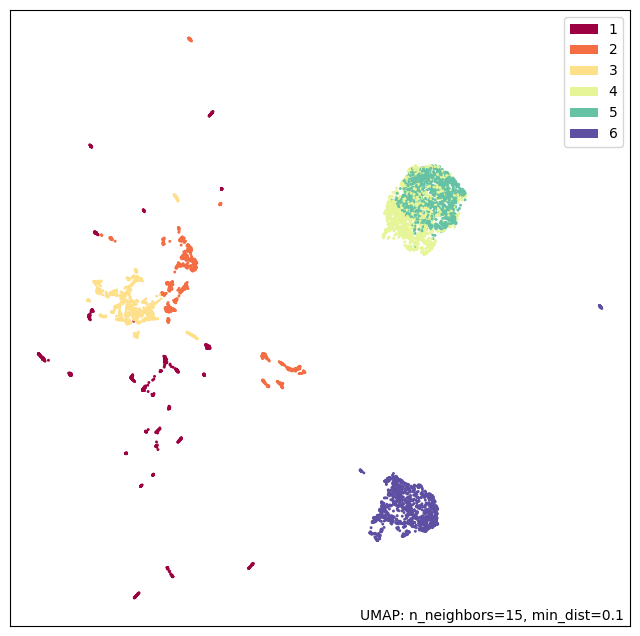

In [7]:
import umap.plot

mapper = umap.UMAP(n_components = 2, random_state = 0).fit(trainXdf)
umap.plot.points(mapper, labels=trainYdf.iloc[:,0])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

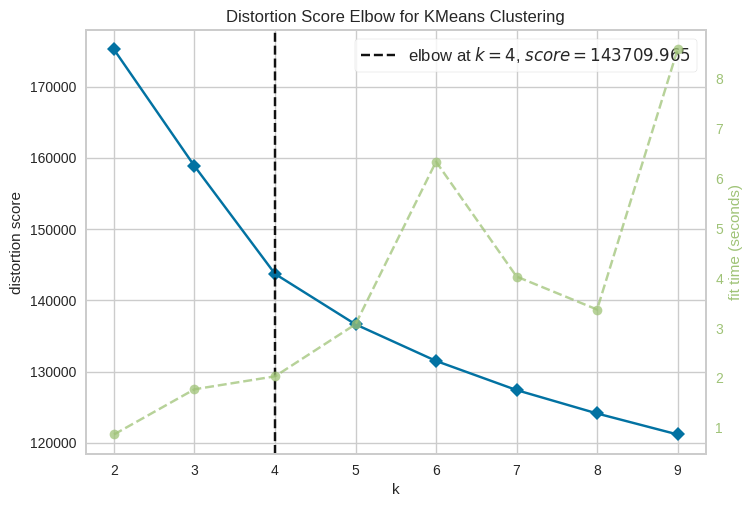

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import SpectralClustering

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(trainXdf)
visualizer.show()

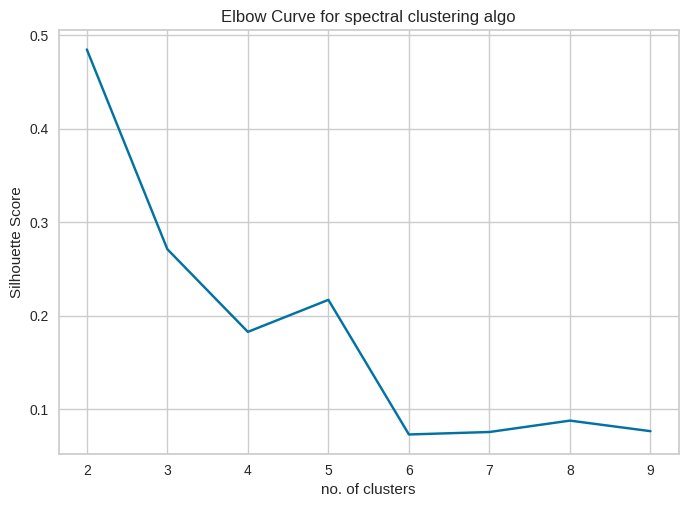

In [9]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

yAxis = []
for i in range(2, 10):
  specAlgo = SpectralClustering(n_clusters=i, affinity='nearest_neighbors')
  outLabels = specAlgo.fit_predict(trainXdf)
  yAxis.append(silhouette_score(trainXdf, outLabels))
  

xAxis = [i for i in range(2, 10)]
plt.plot(xAxis, yAxis, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve for spectral clustering algo')
plt.show()

In [10]:
kmeansOptimal = KMeans(random_state = 0, n_clusters = 4)
kmeansOptimal.fit(trainXdf)
kmOptimalpredLabels = kmeansOptimal.predict(trainXdf)
print("K means silhouette score for optimal K :", silhouette_score(trainXdf, kmOptimalpredLabels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K means silhouette score for optimal K : 0.18722388778315638


In [11]:
specAlgoOptimal = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
specAlgoOptimaloutLabels = specAlgoOptimal.fit_predict(trainXdf)
print("spectral clustering silhouette score for optimal K :", silhouette_score(trainXdf, specAlgoOptimaloutLabels))

spectral clustering silhouette score for optimal K : 0.21675167186593897


In [12]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [13]:
df['Target'] = data['target']
dfTarget = df['Target']
del df['Target']
print(dfTarget)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Target, Length: 178, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
wineTrain1X, wineTest1X, wineTrain1Y, wineTest1Y = train_test_split(df, dfTarget, test_size=0.30, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFClassifer = RandomForestClassifier(random_state=0)
RFClassifer.fit(wineTrain1X, wineTrain1Y)
RFCPred = RFClassifer.predict(wineTest1X)
print(accuracy_score(wineTest1Y, RFCPred))

0.9814814814814815


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

DTree = DecisionTreeClassifier(random_state=0)
DTreeWithBag = BaggingClassifier(DTree, random_state=0)
DTreeWithBag.fit(wineTrain1X, wineTrain1Y)
DTreeWithBagPred = DTreeWithBag.predict(wineTest1X)
print(accuracy_score(wineTest1Y, DTreeWithBagPred))

0.9814814814814815


In [20]:
from sklearn.ensemble import AdaBoostClassifier

ADABoost = AdaBoostClassifier(estimator=DTree, random_state=0)
ADABoost.fit(wineTrain1X, wineTrain1Y)
ADABoostPred = ADABoost.predict(wineTest1X)
print(accuracy_score(wineTest1Y, ADABoostPred))

0.9259259259259259


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

LEncoder = LabelEncoder()
bankData = pd.read_csv('/content/drive/MyDrive/bank.csv', sep=';')
xData = bankData.iloc[:, : bankData.shape[1]-1]
yData = bankData.iloc[:, bankData.shape[1]-1]
colNameList = []
for i in range(xData.shape[1]):
  colNameList.append(xData.columns[i])

newXData = pd.DataFrame(columns=colNameList)
newYData = pd.DataFrame(columns = ['y'])

for i in range(xData.shape[1]):
  if(i==0 or i==5 or i==9 or i==11 or i==12 or i==13 or i==14):
    newXData[colNameList[i]] = xData.iloc[:,i]
  else:
    newXData[colNameList[i]] = LEncoder.fit_transform(xData.iloc[:, i])

newYData['y'] = LEncoder.fit_transform(yData[:])

In [23]:
from sklearn.model_selection import train_test_split
bankTrainX, bankTestX, bankTrainY, bankTestY = train_test_split(newXData, newYData, test_size=0.30, random_state=0)

In [24]:
bankTrainData = bankTrainX[:]
bankTrainData['Decision'] = bankTrainY[:]
print(bankTrainData)

      age  job  marital  education  default  balance  housing  loan  contact  \
565    40    9        1          1        0       56        1     1        0   
3480   47    7        1          1        0      440        1     0        2   
2125   52    9        1          1        0     3554        0     1        0   
3452   31    0        1          1        0        0        1     0        0   
1667   33    1        1          1        0     -346        1     1        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
1033   29    9        2          1        0      534        1     0        0   
3264   36    4        2          2        0      613        0     0        0   
1653   53    1        1          0        0      306        0     0        0   
2607   32    1        1          0        0      642        0     1        0   
2732   45    9        1          0        0     -322        0     0        2   

      day  month  duration  campaign  p

<ipython-input-24-0c2bc63b1582>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankTrainData['Decision'] = bankTrainY[:]


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def gridSearchAccuracy(AlgoNum):
  cparameterList = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
  DTreeAccuracyList = []
  DTreeTrainAccuracyList = []
  DTreeAccuracy = []
  if(AlgoNum==1):
    for i in range(len(cparameterList)):
      DTreeClassifier = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=cparameterList[i])
      DTreeClassifier.fit(bankTrainX, bankTrainY)
      outTrainY = DTreeClassifier.predict(bankTrainX)
      outY = DTreeClassifier.predict(bankTestX)
      DTreeTrainAccuracyList.append(accuracy_score(outTrainY, bankTrainY))
      DTreeAccuracyList.append(accuracy_score(outY, bankTestY))
  elif(AlgoNum==2):
    for i in range(len(cparameterList)):
      DTreeClassifier = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=cparameterList[i], splitter = 'random')
      DTreeClassifier.fit(bankTrainX, bankTrainY)
      outTrainY = DTreeClassifier.predict(bankTrainX)
      outY = DTreeClassifier.predict(bankTestX)
      DTreeTrainAccuracyList.append(accuracy_score(outTrainY, bankTrainY))
      DTreeAccuracyList.append(accuracy_score(outY, bankTestY))
  elif(AlgoNum==3):
    for i in range(len(cparameterList)):
      DTreeClassifier = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=cparameterList[i], splitter = 'best')
      DTreeClassifier.fit(bankTrainX, bankTrainY)
      outTrainY = DTreeClassifier.predict(bankTrainX)
      outY = DTreeClassifier.predict(bankTestX)
      DTreeTrainAccuracyList.append(accuracy_score(outTrainY, bankTrainY))
      DTreeAccuracyList.append(accuracy_score(outY, bankTestY))
  else:
    for i in range(len(cparameterList)):
      DTreeClassifier = DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=cparameterList[i], splitter = 'best')
      DTreeClassifier.fit(bankTrainX, bankTrainY)
      outTrainY = DTreeClassifier.predict(bankTrainX)
      outY = DTreeClassifier.predict(bankTestX)
      DTreeTrainAccuracyList.append(accuracy_score(outTrainY, bankTrainY))
      DTreeAccuracyList.append(accuracy_score(outY, bankTestY))
  DTreeAccuracy.append(DTreeTrainAccuracyList)
  DTreeAccuracy.append(DTreeAccuracyList)
  return DTreeAccuracy

In [41]:
ID3AccuracyList = gridSearchAccuracy(1)
C45AccuracyList = gridSearchAccuracy(2)
C50AccuracyList = gridSearchAccuracy(3)
CARTAccuracyList = gridSearchAccuracy(4)

In [43]:
ID3DF = pd.DataFrame(columns=['max depth', 'train accuracy', 'test accuracy'])
ID3DF['max depth'] = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
ID3DF['train accuracy'] = ID3AccuracyList[0]
ID3DF['test accuracy'] = ID3AccuracyList[1]
print(ID3DF)

   max depth  train accuracy  test accuracy
0          2        0.888116       0.876934
1          5        0.906764       0.879145
2          8        0.935841       0.879145
3         11        0.961441       0.865144
4         14        0.977244       0.863670
5         17        0.991783       0.854827
6         20        0.995891       0.859985
7         23        0.998736       0.858511
8         26        1.000000       0.861459
9         29        1.000000       0.861459


In [44]:
C45DF = pd.DataFrame(columns=['max depth', 'train accuracy', 'test accuracy'])
C45DF['max depth'] = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
C45DF['train accuracy'] = C45AccuracyList[0]
C45DF['test accuracy'] = C45AccuracyList[1]
print(C45DF)

   max depth  train accuracy  test accuracy
0          2        0.889064       0.876934
1          5        0.899178       0.890936
2          8        0.919406       0.888725
3         11        0.942794       0.885777
4         14        0.966814       0.873250
5         17        0.987042       0.862933
6         20        0.994943       0.862196
7         23        0.998104       0.861459
8         26        1.000000       0.858511
9         29        1.000000       0.858511


In [45]:
C50DF = pd.DataFrame(columns=['max depth', 'train accuracy', 'test accuracy'])
C50DF['max depth'] = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
C50DF['train accuracy'] = C50AccuracyList[0]
C50DF['test accuracy'] = C50AccuracyList[1]
print(C50DF)

   max depth  train accuracy  test accuracy
0          2        0.888116       0.876934
1          5        0.906764       0.879145
2          8        0.935841       0.879145
3         11        0.961441       0.865144
4         14        0.977244       0.863670
5         17        0.991783       0.854827
6         20        0.995891       0.859985
7         23        0.998736       0.858511
8         26        1.000000       0.861459
9         29        1.000000       0.861459


In [46]:
CARTDF = pd.DataFrame(columns=['max depth', 'train accuracy', 'test accuracy'])
CARTDF['max depth'] = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
CARTDF['train accuracy'] = CARTAccuracyList[0]
CARTDF['test accuracy'] = CARTAccuracyList[1]
print(CARTDF)

   max depth  train accuracy  test accuracy
0          2        0.895070       0.878408
1          5        0.920986       0.885041
2          8        0.954172       0.880619
3         11        0.973767       0.867354
4         14        0.989886       0.860722
5         17        0.997788       0.862196
6         20        1.000000       0.862933
7         23        1.000000       0.862933
8         26        1.000000       0.862933
9         29        1.000000       0.862933


In [36]:
def ccpp(ccppalphas, algoNum):
  trainTestAccuracyList = []
  trainAccuracyList = []
  testAccuracyList = []
  if(algoNum==1):
    for i in range(len(ccppalphas)):
      ccppTree = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha = ccppalphas[i])
      ccppTree.fit(bankTrainX, bankTrainY)
      trainPred = ccppTree.predict(bankTrainX)
      testPred = ccppTree.predict(bankTestX)
      trainAccuracyList.append(accuracy_score(trainPred, bankTrainY))
      testAccuracyList.append(accuracy_score(testPred, bankTestY))
  elif(algoNum==2):
    for i in range(len(ccppalphas)):
      ccppTree = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter = 'random', ccp_alpha = ccppalphas[i])
      ccppTree.fit(bankTrainX, bankTrainY)
      trainPred = ccppTree.predict(bankTrainX)
      testPred = ccppTree.predict(bankTestX)
      trainAccuracyList.append(accuracy_score(trainPred, bankTrainY))
      testAccuracyList.append(accuracy_score(testPred, bankTestY))
  elif(algoNum==3):
    for i in range(len(ccppalphas)):
      ccppTree = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter = 'best', ccp_alpha = ccppalphas[i])
      ccppTree.fit(bankTrainX, bankTrainY)
      trainPred = ccppTree.predict(bankTrainX)
      testPred = ccppTree.predict(bankTestX)
      trainAccuracyList.append(accuracy_score(trainPred, bankTrainY))
      testAccuracyList.append(accuracy_score(testPred, bankTestY))
  else:
    for i in range(len(ccppalphas)):
      ccppTree = DecisionTreeClassifier(random_state=0, criterion='gini', splitter = 'best', ccp_alpha = ccppalphas[i])
      ccppTree.fit(bankTrainX, bankTrainY)
      trainPred = ccppTree.predict(bankTrainX)
      testPred = ccppTree.predict(bankTestX)
      trainAccuracyList.append(accuracy_score(trainPred, bankTrainY))
      testAccuracyList.append(accuracy_score(testPred, bankTestY))
  trainTestAccuracyList.append(trainAccuracyList)
  trainTestAccuracyList.append(testAccuracyList)
  return trainTestAccuracyList

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ID3CCPPTree = DecisionTreeClassifier(random_state=0, criterion='entropy')
ID3CCPPTree.fit(bankTrainX, bankTrainY)
ID3Path = ID3CCPPTree.cost_complexity_pruning_path(bankTrainX, bankTrainY)
ID3Alphas = ID3Path['ccp_alphas']
print(len(ID3Alphas))

C45CCPPTree = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter = 'random')
C45CCPPTree.fit(bankTrainX, bankTrainY)
C45Path = C45CCPPTree.cost_complexity_pruning_path(bankTrainX, bankTrainY)
C45Alphas = C45Path['ccp_alphas']
print(len(C45Alphas))

C50CCPPTree = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter = 'best')
C50CCPPTree.fit(bankTrainX, bankTrainY)
C50Path = C50CCPPTree.cost_complexity_pruning_path(bankTrainX, bankTrainY)
C50Alphas = C50Path['ccp_alphas']
print(len(C50Alphas))

CARTCCPPTree = DecisionTreeClassifier(random_state=0, criterion='gini', splitter = 'best')
CARTCCPPTree.fit(bankTrainX, bankTrainY)
CARTPath = CARTCCPPTree.cost_complexity_pruning_path(bankTrainX, bankTrainY)
CARTAlphas = CARTPath['ccp_alphas']
print(len(CARTAlphas))

151
146
151
126


In [39]:
ID3CCPPAccuracyList = ccpp(ID3Alphas, 1)
C45CCPPAccuracyList = ccpp(C45Alphas, 2)
C50CCPPAccuracyList = ccpp(C50Alphas, 3)
CARTCCPPAccuracyList = ccpp(CARTAlphas, 4)

In [73]:
ID3CCPPDF = pd.DataFrame(columns=['alphas', 'train accuracy', 'test accuracy'])
ID3CCPPDF['alphas'] = ID3Alphas
ID3CCPPDF['train accuracy'] = ID3CCPPAccuracyList[0]
ID3CCPPDF['test accuracy'] = ID3CCPPAccuracyList[1]
print(ID3CCPPDF.max()[2])
print(ID3CCPPDF)

0.8887251289609432
       alphas  train accuracy  test accuracy
0    0.000000        1.000000       0.861459
1    0.000632        0.996523       0.862933
2    0.000632        0.996523       0.862933
3    0.000632        0.996523       0.862933
4    0.000632        0.996523       0.862933
..        ...             ...            ...
146  0.008194        0.888116       0.876934
147  0.008634        0.888116       0.876934
148  0.014864        0.888116       0.876934
149  0.025612        0.888116       0.876934
150  0.069559        0.888116       0.876934

[151 rows x 3 columns]


In [77]:
C45CCPPDF = pd.DataFrame(columns=['alphas', 'train accuracy', 'test accuracy'])
C45CCPPDF['alphas'] = list(C45Alphas)
C45CCPPDF['train accuracy'] = C45CCPPAccuracyList[0]
C45CCPPDF['test accuracy'] = C45CCPPAccuracyList[1]
print(C45CCPPDF.max()[2])
print(C45CCPPDF)

0.8960943257184967
       alphas  train accuracy  test accuracy
0    0.000000        1.000000       0.858511
1    0.000380        0.999684       0.858511
2    0.000421        0.999052       0.858511
3    0.000435        0.998420       0.857775
4    0.000435        0.998420       0.857775
..        ...             ...            ...
141  0.006217        0.894753       0.885777
142  0.007612        0.894753       0.885777
143  0.007756        0.894437       0.885041
144  0.017391        0.888116       0.876934
145  0.018166        0.888116       0.876934

[146 rows x 3 columns]


In [78]:
C50CCPPDF = pd.DataFrame(columns=['alphas', 'train accuracy', 'test accuracy'])
C50CCPPDF['alphas'] = list(C50Alphas)
C50CCPPDF['train accuracy'] = C50CCPPAccuracyList[0]
C50CCPPDF['test accuracy'] = C50CCPPAccuracyList[1]
print(C50CCPPDF.max()[2])
print(C50CCPPDF)

0.8887251289609432
       alphas  train accuracy  test accuracy
0    0.000000        1.000000       0.861459
1    0.000632        0.996523       0.862933
2    0.000632        0.996523       0.862933
3    0.000632        0.996523       0.862933
4    0.000632        0.996523       0.862933
..        ...             ...            ...
146  0.008194        0.888116       0.876934
147  0.008634        0.888116       0.876934
148  0.014864        0.888116       0.876934
149  0.025612        0.888116       0.876934
150  0.069559        0.888116       0.876934

[151 rows x 3 columns]


In [79]:
CARTCCPPDF = pd.DataFrame(columns=['alphas', 'train accuracy', 'test accuracy'])
CARTCCPPDF['alphas'] = list(CARTAlphas)
CARTCCPPDF['train accuracy'] = CARTCCPPAccuracyList[0]
CARTCCPPDF['test accuracy'] = CARTCCPPAccuracyList[1]
print(CARTCCPPDF.max()[2])
print(CARTCCPPDF)

0.8894620486366986
       alphas  train accuracy  test accuracy
0    0.000000        1.000000       0.862933
1    0.000158        0.999684       0.862933
2    0.000204        0.999368       0.862196
3    0.000205        0.999052       0.862933
4    0.000209        0.998736       0.862933
..        ...             ...            ...
121  0.003055        0.897914       0.888725
122  0.003439        0.896966       0.889462
123  0.006888        0.888116       0.876934
124  0.007599        0.888116       0.876934
125  0.024644        0.888116       0.876934

[126 rows x 3 columns]


In [61]:
import pandas as pd

carDekhoDataX = pd.read_csv('/content/drive/MyDrive/car data.csv')
carDekhoDataY = carDekhoDataX['Selling_Price']
del carDekhoDataX['Selling_Price']
carDekhoDataX["Fuel_Type"].replace({'Petrol':2, 'Diesel':3, 'CNG':4},inplace = True)
carDekhoDataX["Seller_Type"].replace({'Dealer':2, 'Individual':3}, inplace = True)
carDekhoDataX["Transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
carDekhoDataX.drop("Car_Name", axis=1, inplace = True)
maxValues = carDekhoDataX.max()
carDekhoDataX['Year'] = carDekhoDataX['Year'].div(maxValues[0])
carDekhoDataX['Present_Price'] = carDekhoDataX['Present_Price'].div(maxValues[1])
carDekhoDataX['Kms_Driven'] = carDekhoDataX['Kms_Driven'].div(maxValues[2])
carDekhoDataX['Fuel_Type'] = carDekhoDataX['Fuel_Type'].div(maxValues[3])
carDekhoDataX['Seller_Type'] = carDekhoDataX['Seller_Type'].div(maxValues[4])
carDekhoDataX['Transmission'] = carDekhoDataX['Transmission'].div(maxValues[5])
carDekhoDataX['Owner'] = carDekhoDataX['Owner'].div(maxValues[6])
maxVal = carDekhoDataY.max()
for i in range(carDekhoDataY.shape[0]):
  carDekhoDataY.iloc[i] = carDekhoDataY.iloc[i]/maxVal
print(carDekhoDataY)

0      0.095714
1      0.135714
2      0.207143
3      0.081429
4      0.131429
         ...   
296    0.271429
297    0.114286
298    0.095714
299    0.328571
300    0.151429
Name: Selling_Price, Length: 301, dtype: float64


In [62]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(carDekhoDataX, carDekhoDataY, test_size=0.2, random_state=0)

In [63]:
def LassogradientDescent(theta, trainX, trainY, learningRate, pmLambda):    
  m = trainX.shape[0]
  n = trainX.shape[1]
  grad = 0
  for i in range(m):
    tempSum2 = theta[0]
    for j in range(n):
      tempSum2 = tempSum2 + trainX.iloc[i, j]*theta[j+1]
    grad = grad + (tempSum2-trainY.iloc[i])
  grad = grad/m
  theta[0] = theta[0] - learningRate*grad
  
  for i in range(1, n):
    grad = 0
    for j in range(m):
      tempSum2 = theta[0]
      for k in range(n):
        tempSum2 = tempSum2 + trainX.iloc[j, k]*theta[k+1]
      grad = grad + trainX.iloc[j,i]*(tempSum2-trainY.iloc[j])
    grad = grad/m

    if(theta[i]<0):
      grad = grad - (pmLambda/2*m)
    else:
      grad = grad + (pmLambda/2*m)

    theta[i] = theta[i] - learningRate*grad
  return theta

In [65]:
learningRate = 0.05
epochs = 100
bestMSE = 1000000000
bestLambda = -1

for k in range(0, 10):
  theta = []
  for i in range(trainX.shape[1]+1):
    theta.append(0)
  for i in range(epochs):
    updatedTheta = LassogradientDescent(theta, trainX, trainY, learningRate, 0.05*k)
    for j in range(len(updatedTheta)):
      theta[j] = updatedTheta[j]

  predicted = []
  for i in range(testX.shape[0]):
    yPred = theta[0]
    for j in range(testX.shape[1]):
      yPred = yPred + theta[j+1]*testX.iloc[i,j]
    predicted.append(yPred)
  MSETemp = 0
  for i in range(len(predicted)):
    MSETemp = MSETemp + (predicted[i]-testY.iloc[i])**2
  MSETemp = MSETemp/len(predicted)
  if(MSETemp<bestMSE):
    bestMSE = MSETemp
    bestLambda = k

for i in range(epochs):
  updatedTheta = LassogradientDescent(theta, trainX, trainY, learningRate, bestLambda*0.05)
  for j in range(len(updatedTheta)):
    theta[j] = updatedTheta[j]
predicted = []
for i in range(testX.shape[0]):
  yPred = theta[0]
  for j in range(testX.shape[1]):
    yPred = yPred + theta[j+1]*testX.iloc[i,j]
  predicted.append(yPred)

print("best MSE", bestMSE)
print(predicted)
print(testY)

best MSE 0.023077623856955203
[0.07651606368091982, 0.1622637356140981, 0.12831489159145712, 0.07234850640895255, 0.07008189105329078, 0.12507468262099183, 0.13017963080049785, 0.1617934240777498, 0.12839447428588585, 0.13113873074762597, 0.12720102229965088, 0.16182054718879205, 0.12769931264220782, 0.1264688541175989, 0.07372775566090747, 0.12981054033799394, 0.12616041349166668, 0.13126995615675033, 0.16663191334784125, 0.16233719881863992, 0.13177503017811887, 0.12461811747404625, 0.12990899265460587, 0.13036250498637206, 0.17161882459835667, 0.16269654408208697, 0.1746228711113488, 0.16581436351730897, 0.163667923479314, 0.13721015711169288, 0.074641348934541, 0.07416170080680726, 0.16602198647171998, 0.06909856154878927, 0.13700903965642477, 0.16345121823274303, 0.127444590062722, 0.07223035334161212, 0.1655232060269801, 0.07804778104054783, 0.06631231913828142, 0.07916528971878763, 0.12469588698905101, 0.13073814197145958, 0.07308673513047476, 0.07328121373382085, 0.166697383191

In [64]:
def RidgegradientDescent(theta, trainX, trainY, learningRate, pmLambda):    
  m = trainX.shape[0]
  n = trainX.shape[1]
  grad = 0
  for i in range(m):
    tempSum2 = theta[0]
    for j in range(n):
      tempSum2 = tempSum2 + trainX.iloc[i, j]*theta[j+1]
    grad = grad + (tempSum2-trainY.iloc[i])
  grad = grad/m
  theta[0] = theta[0] - learningRate*grad
  
  for i in range(1, n):
    grad = 0
    for j in range(m):
      tempSum2 = theta[0]
      for k in range(n):
        tempSum2 = tempSum2 + trainX.iloc[j, k]*theta[k+1]
      grad = grad + trainX.iloc[j,i]*(tempSum2-trainY.iloc[j])
    grad = grad/m

    grad = grad + pmLambda*theta[i]/m

    theta[i] = theta[i] - learningRate*grad
  return theta

In [66]:
learningRate = 0.05
epochs = 100
bestMSE = 1000000000
bestLambda = -1

for k in range(0, 10):
  theta = []
  for i in range(trainX.shape[1]+1):
    theta.append(0)
  for i in range(epochs):
    updatedTheta = RidgegradientDescent(theta, trainX, trainY, learningRate, 0.05*k)
    for j in range(len(updatedTheta)):
      theta[j] = updatedTheta[j]

  predicted = []
  for i in range(testX.shape[0]):
    yPred = theta[0]
    for j in range(testX.shape[1]):
      yPred = yPred + theta[j+1]*testX.iloc[i,j]
    predicted.append(yPred)
  MSETemp = 0
  for i in range(len(predicted)):
    MSETemp = MSETemp + (predicted[i]-testY.iloc[i])**2
  MSETemp = MSETemp/len(predicted)
  if(MSETemp<bestMSE):
    bestMSE = MSETemp
    bestLambda = k

for i in range(epochs):
  updatedTheta = RidgegradientDescent(theta, trainX, trainY, learningRate, bestLambda*0.05)
  for j in range(len(updatedTheta)):
    theta[j] = updatedTheta[j]
predicted2 = []
for i in range(testX.shape[0]):
  yPred = theta[0]
  for j in range(testX.shape[1]):
    yPred = yPred + theta[j+1]*testX.iloc[i,j]
  predicted2.append(yPred)

print("best MSE", bestMSE)
print(predicted2)
print(testY)

best MSE 0.02306972385605069
[0.1053933311541067, 0.14704993109698603, 0.1298709482533586, 0.10054406268826199, 0.09376962561039452, 0.12648314857649384, 0.13157714617118052, 0.146454210885911, 0.1275077351780074, 0.1318380034913187, 0.1291998286796666, 0.14637302025735574, 0.1291705818495527, 0.12462778936099587, 0.10215824197666928, 0.12434091684845498, 0.12466793912877118, 0.13260937914415566, 0.15140478605114568, 0.14662001900030594, 0.13067188750597664, 0.12609492974620998, 0.12833005035010825, 0.12975675859372557, 0.1566445205617308, 0.14724936289578974, 0.15955404496091505, 0.1504204774239062, 0.1483858111387861, 0.1343354106907216, 0.10440213759970618, 0.10291665383732163, 0.1506873775496704, 0.09799460275605515, 0.13772637192398524, 0.14787208574455077, 0.1284090930979811, 0.10148187804795972, 0.15048262031423823, 0.10573175114406494, 0.09484473946971786, 0.09867299904294906, 0.1262125918299502, 0.13193227224631288, 0.10232959921950793, 0.10094386861902535, 0.15152048911630858

[0.14500000000000002, 0.015, 0.11071428571428571, 0.2142857142857143, 0.625, 0.1457142857142857, 0.10857142857142857, 0.024285714285714285, 0.15071428571428575, 0.1492857142857143, 0.07142857142857142, 0.024285714285714285, 0.13285714285714284, 0.19428571428571428, 0.2142857142857143, 0.3192857142857143, 0.1607142857142857, 0.12142857142857141, 0.017142857142857144, 0.045714285714285714, 0.19285714285714284, 0.12857142857142856, 0.19285714285714284, 0.2621428571428571, 0.012142857142857143, 0.015, 0.012142857142857143, 0.013714285714285714, 0.012428571428571428, 0.2307142857142857, 0.10285714285714286, 0.1707142857142857, 0.015857142857142858, 0.19571428571428573, 0.13, 0.03214285714285715, 0.17142857142857143, 0.13642857142857143, 0.005714285714285714, 0.28285714285714286, 0.2835714285714286, 0.6571428571428571, 0.1457142857142857, 0.11428571428571428, 0.185, 0.3464285714285714, 0.015714285714285715, 0.020714285714285716, 0.1635714285714286, 0.14714285714285713, 0.3192857142857143, 0.

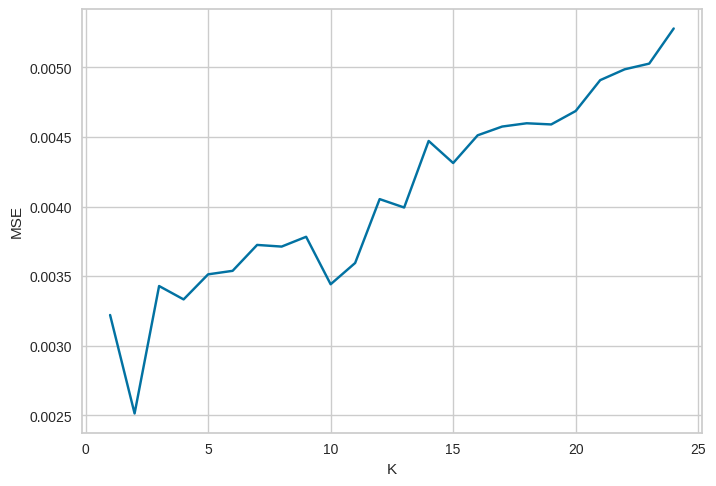

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

def euclideanDist(trainX, testX):
  euclideanList = []
  for i in range(testX.shape[0]):
    tempDist = []
    for j in range(trainX.shape[0]):
      dist = 0
      for k in range(trainX.shape[1]):
        dist = dist + (trainX.iloc[j,k]-testX.iloc[i,k])**2
      dist = dist**0.5
      tempDist.append([j,dist])
    euclideanList.append(tempDist)
  return euclideanList

def knearestMean(euclideanList, k, trainY):
	sortedEuclideanList = sorted(euclideanList, key=lambda x: (x[1]))
	summ = 0
	for i in range(k):
		summ = summ + trainY.iloc[sortedEuclideanList[i][0]]
	return summ/k

ListOfEuclideans = euclideanDist(trainX, testX)

predictionForEachK = []
for k in range(1, 25):
  predictions = []
  for i in range(testX.shape[0]):
    predictions.append(knearestMean(ListOfEuclideans[i], k, trainY))
  predictionForEachK.append(predictions)


MSEScoresForEachK = []
for i in range(1, 25):
  summ = 0
  for j in range(testX.shape[0]):
    summ = summ + (predictionForEachK[i-1][j]-testY.iloc[j])**2
  summ = summ/testX.shape[0]
  MSEScoresForEachK.append(summ)

minMSE = 1000
minMSEIdx = -1
for i in range(len(MSEScoresForEachK)):
  if(MSEScoresForEachK[i]<minMSE):
    minMSE = MSEScoresForEachK[i]
    minMSEIdx = i+1

predicted3 = predictionForEachK[minMSEIdx-1]
print(predicted3)
xAxis = [i for i in range(1, 25)]
plt.plot(xAxis, MSEScoresForEachK)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

K = 101
mserrorList = []
for i in range(5, K, 5):
  DTreeRegressor = DecisionTreeRegressor(random_state=0, max_depth = K)
  DTreeRegressor.fit(trainX, trainY)
  pred = DTreeRegressor.predict(testX)
  mserror = mean_squared_error(pred, testY)
  mserrorList.append(mserror)

minMSE = 10000
minMSEIdx = -1
for i in range(len(mserrorList)):
  if(mserrorList[i]<minMSE):
    minMSE = mserrorList[i]
    minMSEIdx = i

DTreeRegressor = DecisionTreeRegressor(random_state=0, max_depth = minMSEIdx+2)
DTreeRegressor.fit(trainX, trainY)
predicted4 = DTreeRegressor.predict(testX)
print(predicted4)

[0.17325668 0.03126569 0.17325668 0.17325668 0.17325668 0.17325668
 0.17325668 0.03126569 0.17325668 0.17325668 0.03126569 0.03126569
 0.17325668 0.17325668 0.17325668 0.17325668 0.17325668 0.17325668
 0.03126569 0.03126569 0.17325668 0.17325668 0.17325668 0.17325668
 0.03126569 0.03126569 0.03126569 0.03126569 0.03126569 0.17325668
 0.17325668 0.17325668 0.03126569 0.17325668 0.17325668 0.03126569
 0.17325668 0.17325668 0.03126569 0.17325668 0.17325668 0.54964286
 0.17325668 0.17325668 0.17325668 0.17325668 0.03126569 0.03126569
 0.17325668 0.17325668 0.17325668 0.03126569 0.17325668 0.54964286
 0.03126569 0.03126569 0.03126569 0.03126569 0.17325668 0.03126569
 0.17325668]


In [71]:
ensemblePred = []
for i in range(testX.shape[0]):
  avg = (predicted[i] + predicted2[i] + predicted3[i] + predicted4[i])/4
  ensemblePred.append(avg)

print(ensemblePred)
mserror = mean_squared_error(ensemblePred, testY)
print("MSE of ensembled output :", mserror)

[0.13653882806211926, 0.08383391454639692, 0.135241783193126, 0.15185650721935667, 0.25195559482071755, 0.1425837423986308, 0.13542829484130353, 0.08589450953553672, 0.1444600045333965, 0.14573061817956687, 0.0896467343026737, 0.08586314212410019, 0.14048186886905395, 0.15417041787555366, 0.15252225658680205, 0.18537445919303872, 0.14578339748254493, 0.13906649276564495, 0.0861799464648525, 0.09132566946027863, 0.15632199326945406, 0.13813517059956945, 0.15535269901220408, 0.17309573289581945, 0.08711179778756065, 0.08390274650253439, 0.08831357859303471, 0.08490776166106064, 0.08374459702568682, 0.16735425520291766, 0.12558772699090498, 0.14194389125633983, 0.0855531071691894, 0.14613862822801613, 0.14336578967020855, 0.08845337975506218, 0.14982254931011713, 0.13276202134080745, 0.08294501592601271, 0.1711731700149372, 0.16679531365352498, 0.35622723075401885, 0.14247211045951066, 0.1369993428960287, 0.1452606073696897, 0.18507009488946438, 0.08586339654462648, 0.0853877951182012, 0.